In [122]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [123]:
# trade data ( don't know how to analyze trade data yet)
trade = pd.read_csv('round-1-island-data-bottle/trades_round_1_day_0.csv',sep=';')
trade.head()

,timestamp,buyer,seller,symbol,currency,price,quantity
0,100,NaN,NaN,RAINFOREST_RESIN,SEASHELLS,10002.0,1
1,300,NaN,NaN,KELP,SEASHELLS,2029.0,6
2,300,NaN,NaN,RAINFOREST_RESIN,SEASHELLS,9998.0,2
3,300,NaN,NaN,RAINFOREST_RESIN,SEASHELLS,9998.0,1
4,300,NaN,NaN,SQUID_INK,SEASHELLS,1965.0,6


In [124]:
price = pd.read_csv('round-1-island-data-bottle/prices_round_1_day_-2.csv',sep=';')
price.head()
price.fillna(0,inplace=True)
price.set_index('timestamp',inplace=True)
RESIN = "RAINFOREST_RESIN"
KELP = "KELP"
INK = "SQUID_INK"
price.head()

# 计算盘口中间价
price['mid_depth_price'] = (price['bid_price_1'] * price['bid_volume_1'] + price['bid_price_2']*price['bid_volume_2'] + price['bid_price_3']*price['bid_volume_3'] 
                            + price['ask_price_1']*price['ask_volume_1'] + price['ask_price_2']*price['ask_volume_2'] + price['ask_price_3']*price['ask_volume_3']
                            )/(
                                price['bid_volume_1']+price['bid_volume_2']+price['bid_volume_3']+price['ask_volume_1']+price['ask_volume_2']+price['ask_volume_3'])
price.head()

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,mid_depth_price
timestamp,,,,,,,,,,,,,,,,,
0,-2,RAINFOREST_RESIN,9996,1,9995.0,25.0,0.0,0.0,10004,1,10005.0,25.0,0.0,0.0,10000.0,0.0,10000.00000
0,-2,KELP,1998,26,0.0,0.0,0.0,0.0,2002,26,0.0,0.0,0.0,0.0,2000.0,0.0,2000.00000
0,-2,SQUID_INK,1998,26,0.0,0.0,0.0,0.0,2002,26,0.0,0.0,0.0,0.0,2000.0,0.0,2000.00000
100,-2,SQUID_INK,1999,5,1998.0,26.0,0.0,0.0,2001,20,0.0,0.0,0.0,0.0,2000.0,0.0,1999.27451
100,-2,RAINFOREST_RESIN,10000,5,9995.0,20.0,0.0,0.0,10005,20,0.0,0.0,0.0,0.0,10002.5,0.0,10000.00000


In [125]:
# 计算收益率
price['return'] = price.groupby('product')['mid_depth_price'].pct_change()
# 计算收益率相关性
returns_df = price.pivot(columns='product', values='return')
returns_df.corr()

product,KELP,RAINFOREST_RESIN,SQUID_INK
product,,,
KELP,1.000000,0.011246,0.014612
RAINFOREST_RESIN,0.011246,1.000000,-0.008033
SQUID_INK,0.014612,-0.008033,1.000000


In [126]:
price_df = price.pivot(columns='product', values='mid_depth_price')
price_df.corr()

product,KELP,RAINFOREST_RESIN,SQUID_INK
product,,,
KELP,1.000000,-0.000792,0.281824
RAINFOREST_RESIN,-0.000792,1.000000,0.000787
SQUID_INK,0.281824,0.000787,1.000000


In [127]:
# 计算最大可能收益
kelp_price = price[price['product'] == KELP]
kelp_max_return = (kelp_price[kelp_price['return'] >= 0]['return'] + 1).cumprod().iloc[-1]

resin_price = price[price['product'] == RESIN]
resin_max_return = (resin_price[resin_price['return'] >= 0]['return'] + 1).cumprod().iloc[-1]

ink_price = price[price['product'] == INK]
ink_max_return = (ink_price[ink_price['return'] >= 0]['return'] + 1).cumprod().iloc[-1]

print("kelp max return:", kelp_max_return)
print("resin max return:", resin_max_return)
print("ink max return:", ink_max_return)


kelp max return: 1.4682471534303474
resin max return: 1.1636235798473138
ink max return: 12.72472133015847


KELP IC:
                 Future Return 1  Future Return 5  Future Return 10
Feature                                                            
buy_pressure           -0.139693        -0.118957         -0.106547
sell_pressure           0.204675         0.183207          0.177726
pressure_ratio         -0.487213        -0.427006         -0.395818
price_deviation        -0.603696        -0.547475         -0.510609
spread                 -0.095926        -0.074240         -0.068538
relative_spread        -0.079380        -0.057004         -0.050340
order_imbalance         0.538782         0.495990          0.457376
ma_ratio               -0.163946        -0.124284         -0.112656
volatility              0.000158         0.018544          0.018795
momentum_5             -0.417942        -0.394752         -0.344629
momentum_10            -0.382799        -0.337981         -0.309777

RAINFOREST_RESIN IC:
                 Future Return 1  Future Return 5  Future Return 10
Feature          

/tmp/ipykernel_103063/1341102078.py:158: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  avg_ic_df = pd.concat([avg_ic_df, pd.DataFrame({


<Figure size 1200x800 with 0 Axes>

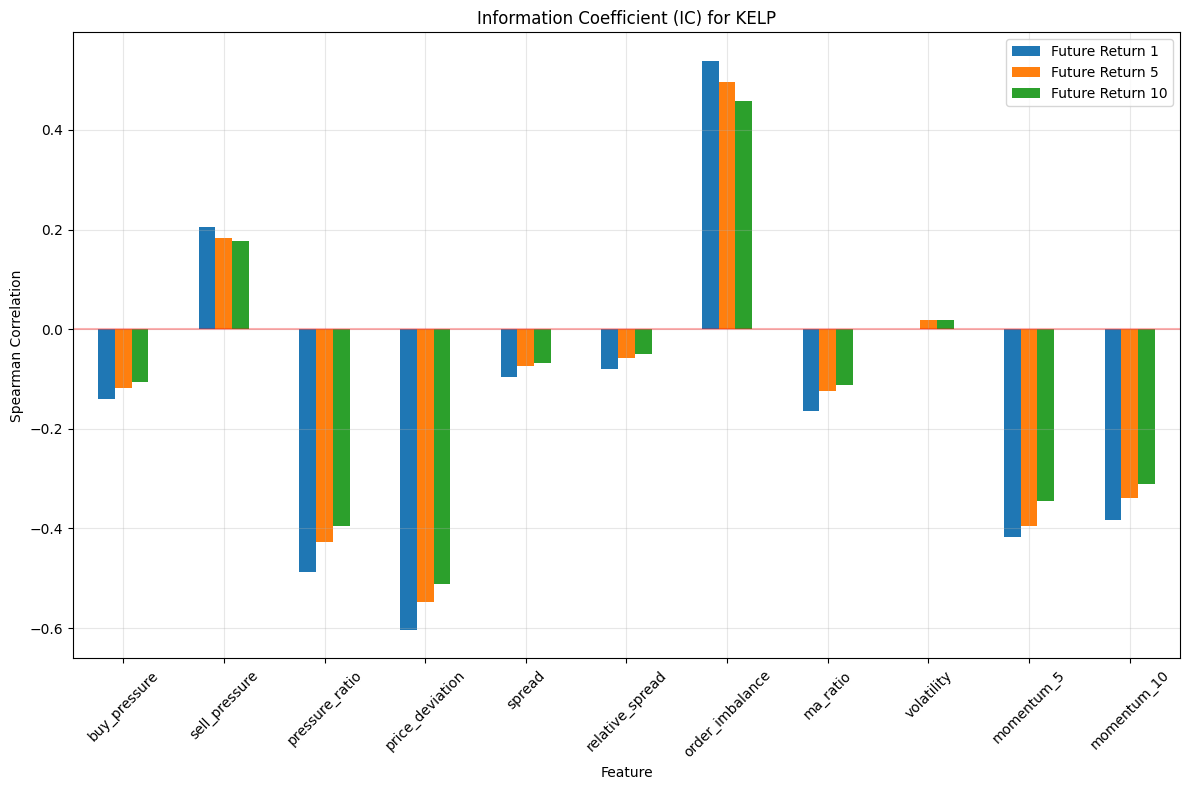

<Figure size 1200x800 with 0 Axes>

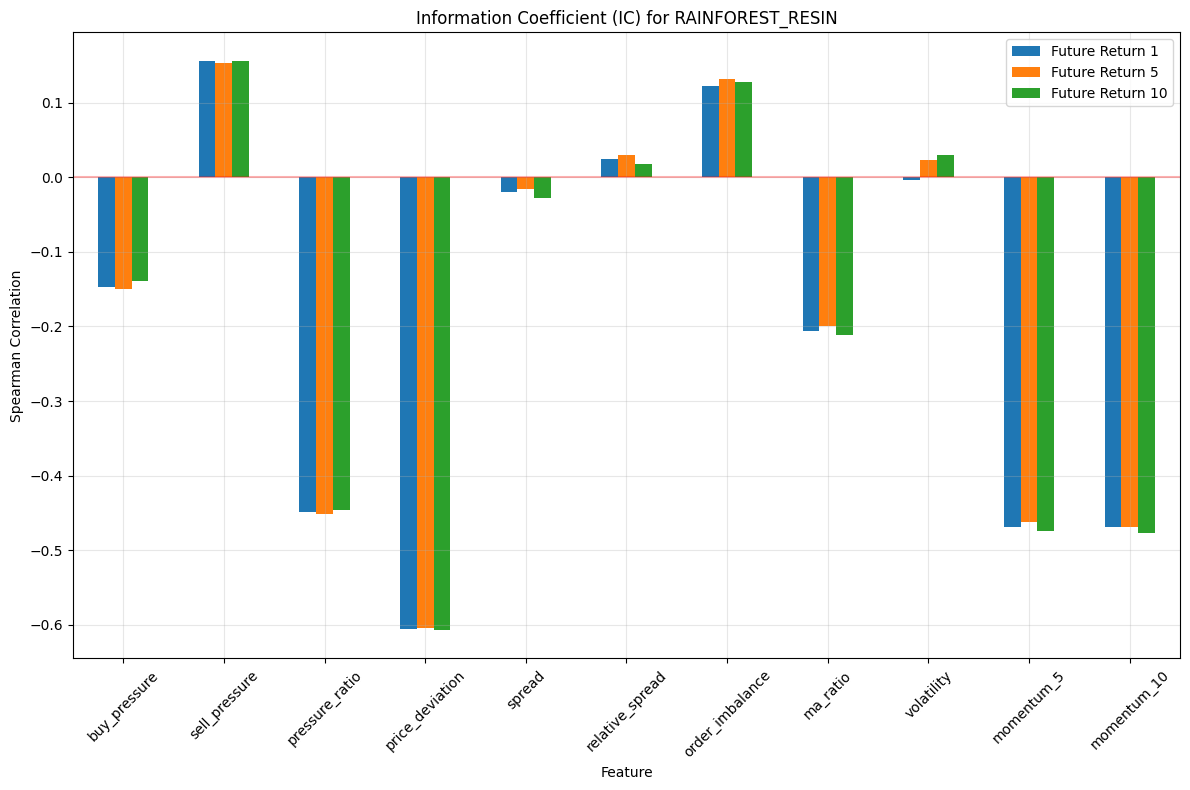

<Figure size 1200x800 with 0 Axes>

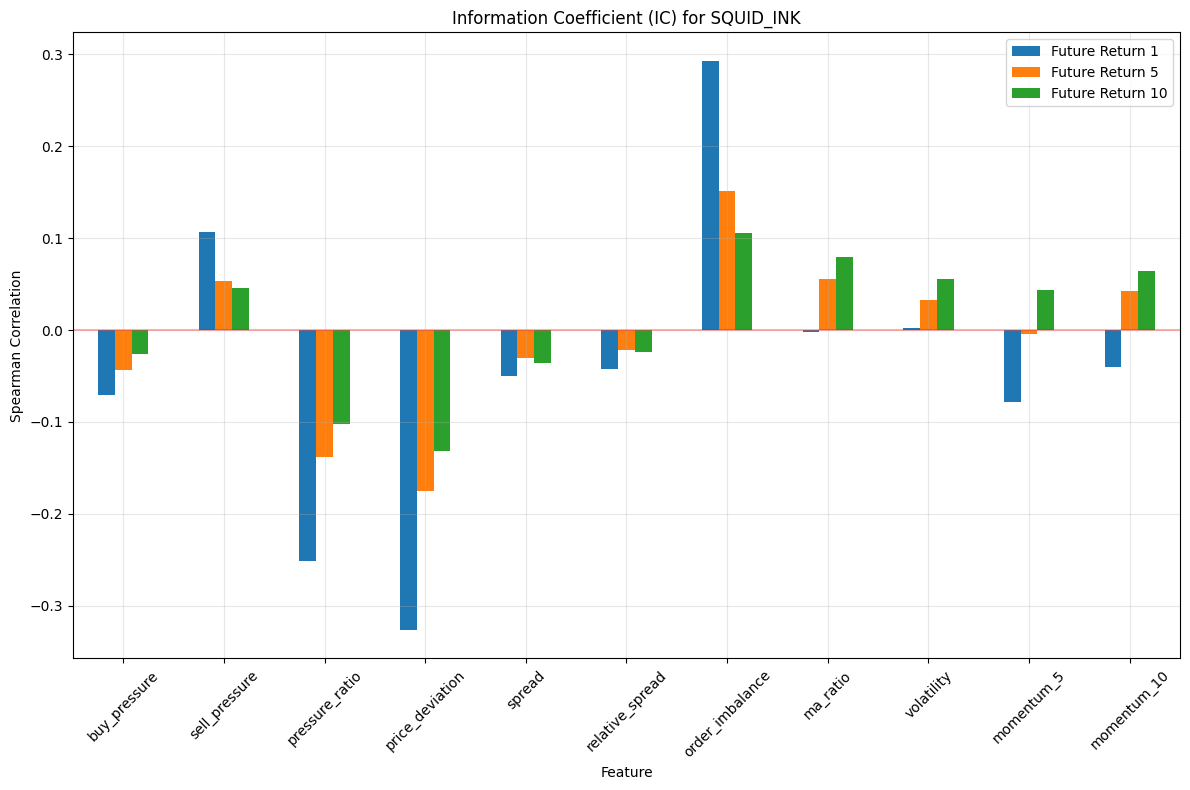

<Figure size 1200x800 with 0 Axes>

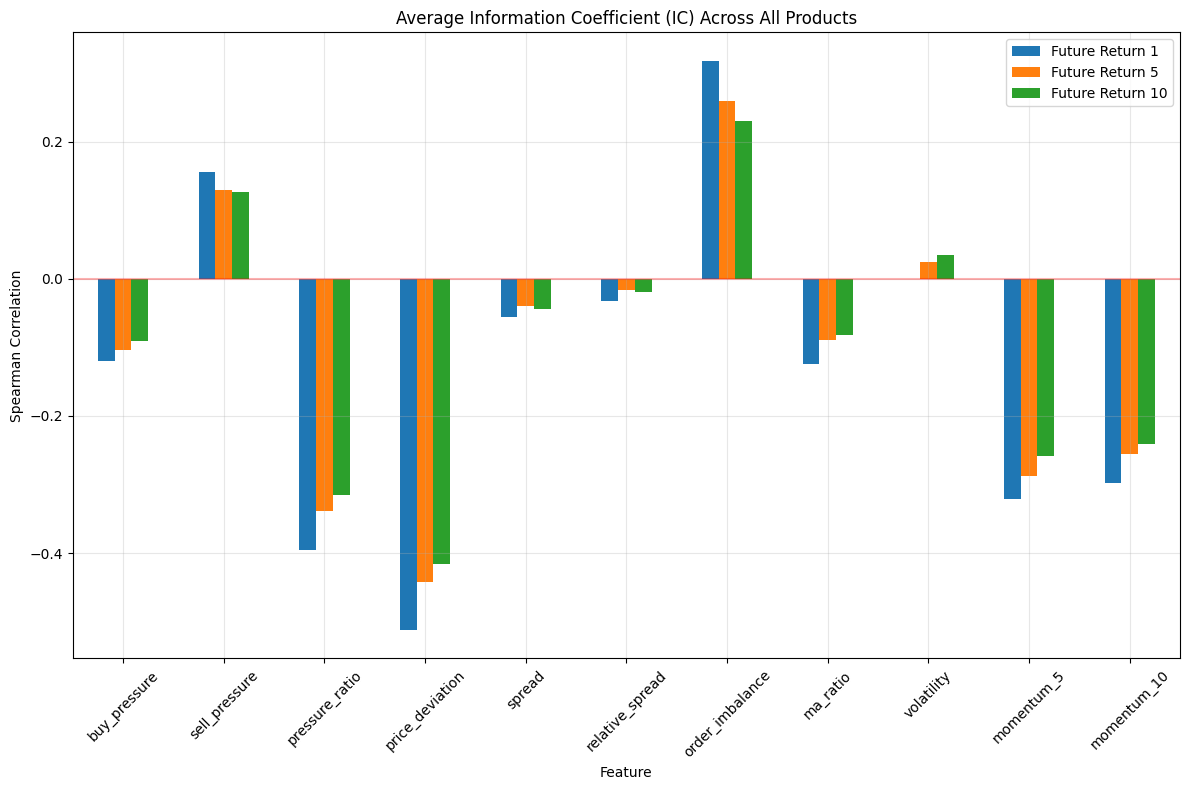

In [128]:
# 导入需要的库
import numpy as np
from scipy.stats import spearmanr

# 按产品分组并为每个产品计算特征
def create_features(df):
    features = pd.DataFrame()
    
    # 按产品分组
    for product in [KELP, RESIN, INK]:
        product_data = df[df['product'] == product].copy()
        
        # 计算买卖压力因子
        product_data['buy_pressure'] = product_data['bid_volume_1'] + product_data['bid_volume_2'] + product_data['bid_volume_3']
        product_data['sell_pressure'] = product_data['ask_volume_1'] + product_data['ask_volume_2'] + product_data['ask_volume_3']
        product_data['pressure_ratio'] = product_data['buy_pressure'] / (product_data['sell_pressure'] + 1e-10)
        
        # 计算价格偏离度因子
        product_data['price_deviation'] = (product_data['mid_price'] - product_data['mid_depth_price']) / product_data['mid_depth_price']
        
        # 计算价差因子
        product_data['spread'] = product_data['ask_price_1'] - product_data['bid_price_1']
        product_data['relative_spread'] = product_data['spread'] / product_data['mid_price']
        
        # 计算不平衡因子
        product_data['order_imbalance'] = (product_data['bid_volume_1'] - product_data['ask_volume_1']) / (product_data['bid_volume_1'] + product_data['ask_volume_1'] + 1e-10)
        
        # 计算移动平均和相对强度
        product_data['ma_5'] = product_data['mid_price'].rolling(5).mean()
        product_data['ma_10'] = product_data['mid_price'].rolling(10).mean()
        product_data['ma_ratio'] = product_data['ma_5'] / (product_data['ma_10'] + 1e-10)
        
        # 计算波动率
        product_data['volatility'] = product_data['return'].rolling(10).std()
        
        # 计算价格动量
        product_data['momentum_5'] = product_data['mid_price'].pct_change(5)
        product_data['momentum_10'] = product_data['mid_price'].pct_change(10)
        
        # 添加产品标识符并合并到特征数据框
        product_data['product'] = product
        
        # 保存特征
        if features.empty:
            features = product_data
        else:
            features = pd.concat([features, product_data])
    
    # 填充缺失值
    features = features.fillna(0)
    return features

# 应用特征创建函数
features_df = create_features(price)

# 计算未来收益率作为目标变量（一阶价格变化）
features_df['future_return_1'] = features_df.groupby('product')['mid_price'].shift(-1) / features_df['mid_price'] - 1
features_df['future_return_5'] = features_df.groupby('product')['mid_price'].shift(-5) / features_df['mid_price'] - 1
features_df['future_return_10'] = features_df.groupby('product')['mid_price'].shift(-10) / features_df['mid_price'] - 1

# 删除缺失的目标变量
features_df = features_df.dropna(subset=['future_return_1', 'future_return_5', 'future_return_10'])

# 计算因子与未来收益率之间的IC值
def calculate_ic(features_df, feature_cols, target_cols):
    ic_results = {}
    
    for product in [KELP, RESIN, INK]:
        product_data = features_df[features_df['product'] == product]
        
        product_ic = {}
        for feature in feature_cols:
            feature_ic = {}
            for target in target_cols:
                # 计算Spearman相关系数
                if len(product_data) > 0:
                    ic, p_value = spearmanr(product_data[feature], product_data[target], nan_policy='omit')
                    feature_ic[target] = ic
                else:
                    feature_ic[target] = np.nan
            product_ic[feature] = feature_ic
        ic_results[product] = product_ic
    
    return ic_results

# 定义特征列和目标列
feature_cols = ['buy_pressure', 'sell_pressure', 'pressure_ratio', 
                'price_deviation', 'spread', 'relative_spread',
                'order_imbalance', 'ma_ratio', 'volatility',
                'momentum_5', 'momentum_10']

target_cols = ['future_return_1', 'future_return_5', 'future_return_10']

# 计算IC值
ic_results = calculate_ic(features_df, feature_cols, target_cols)

# 可视化IC结果
def visualize_ic(ic_results, product):
    ic_df = pd.DataFrame({
        'Feature': [],
        'Future Return 1': [],
        'Future Return 5': [],
        'Future Return 10': []
    })
    
    for feature, targets in ic_results[product].items():
        ic_df = pd.concat([ic_df, pd.DataFrame({
            'Feature': [feature],
            'Future Return 1': [targets['future_return_1']],
            'Future Return 5': [targets['future_return_5']],
            'Future Return 10': [targets['future_return_10']]
        })], ignore_index=True)
    
    ic_df = ic_df.set_index('Feature')
    
    plt.figure(figsize=(12, 8))
    ic_df.plot(kind='bar', figsize=(12, 8))
    plt.title(f'Information Coefficient (IC) for {product}')
    plt.ylabel('Spearman Correlation')
    plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    return ic_df

# 为每个产品可视化IC
kelp_ic = visualize_ic(ic_results, KELP)
resin_ic = visualize_ic(ic_results, RESIN)
ink_ic = visualize_ic(ic_results, INK)

# 打印IC结果
print("KELP IC:")
print(kelp_ic)
print("\nRAINFOREST_RESIN IC:")
print(resin_ic)
print("\nSQUID_INK IC:")
print(ink_ic)

# 计算平均IC
def calculate_avg_ic(ic_results):
    avg_ic = {}
    for feature in feature_cols:
        feature_ic = {}
        for target in target_cols:
            ics = [
                ic_results[KELP][feature][target],
                ic_results[RESIN][feature][target],
                ic_results[INK][feature][target]
            ]
            feature_ic[target] = np.mean(ics)
        avg_ic[feature] = feature_ic
    return avg_ic

avg_ic = calculate_avg_ic(ic_results)
avg_ic_df = pd.DataFrame(columns=['Feature', 'Future Return 1', 'Future Return 5', 'Future Return 10'])

for feature, targets in avg_ic.items():
    avg_ic_df = pd.concat([avg_ic_df, pd.DataFrame({
        'Feature': [feature],
        'Future Return 1': [targets['future_return_1']],
        'Future Return 5': [targets['future_return_5']],
        'Future Return 10': [targets['future_return_10']]
    })], ignore_index=True)

avg_ic_df = avg_ic_df.set_index('Feature')

plt.figure(figsize=(12, 8))
avg_ic_df.plot(kind='bar', figsize=(12, 8))
plt.title('Average Information Coefficient (IC) Across All Products')
plt.ylabel('Spearman Correlation')
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

print("\nAverage IC Across All Products:")
print(avg_ic_df)